In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

# 범주형 변수 정규분포??

In [3]:
bloodtype = ['A','A','A','B','B','AB','O',]

* 데이터 확인

In [4]:
np.unique(bloodtype, return_counts=True) #각 변수별 개수도 리턴

(array(['A', 'AB', 'B', 'O'], dtype='<U2'), array([3, 1, 2, 1], dtype=int64))

In [5]:
pd.Series(bloodtype).value_counts()

A     3
B     2
O     1
AB    1
dtype: int64

<AxesSubplot:ylabel='count'>

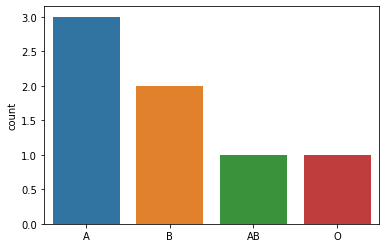

In [8]:
sns.countplot(bloodtype)

# 연속형 변수 시각화?

In [9]:
x = [1,1,1,2,3,5,5,7,8,9]

In [11]:
#데이터 범위를 4 구간으로 나눔
hist, edges = np.histogram(x, 4) 
#(array([4, 1, 2, 3], dtype=int64), array([1., 3., 5., 7., 9.])) 
# 두개의 배열이 return됌 : (구간별 요소 개수, 구간경계)

In [12]:
hist, edges

(array([4, 1, 2, 3], dtype=int64), array([1., 3., 5., 7., 9.]))

<AxesSubplot:>

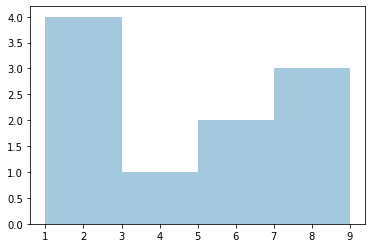

In [15]:
sns.distplot(x, bins=4, kde=False) #bins:구간개수, kde:선그래프

In [ ]:
"""
왜도 vs 첨도?
"""

# 중심경향(평균, 최빈수, 중앙값) : 자료 전체 대표

In [16]:
x = [100, 100, 200, 400, 500]

In [17]:
np.mean(x) #평균은 극단치(outlier)의 영향을 잘 받는다. -> 소득분포처럼 비대칭인 자료에 대해서는 평균값이 자료를 대표하기 어려움

260.0

In [18]:
np.median(x) #중위수는 극단치(outlier)의 영향을 잘 받지 않는다.

200.0

In [19]:
from scipy.stats import mode
mode(x) #최빈수

ModeResult(mode=array([100]), count=array([2]))

# 흩어진정도(분산, 표준편차, 사분위)

In [ ]:
#대부분의 자료는 중심 부분에 많이 몰려있는 경향이 있음
# 평균에서 표준편차의 k배 만큼 떨어져 있다. -> k표준편차

#표준편차 : 평균에서 떨어진 정도
#IQR : 중간값에서 벗어난 정도

In [26]:
x = [1,1,1,2,3,5,5,7,8,9]

In [27]:
## 뭐있던데...
np.max(x)-np.min(x) #자료범위(자료의 퍼짐 정도)

8

In [28]:
#분산? 평균으로부터 자료가 얼마나 벗어나 있는지를 나타내는 정도
#데이터-평균 -> 제곱-> 평균
#분산이 큼? 데이터가 평균에서 많이 벗어나있다
#분산이 작음? 데이터가 평균 주변에 모여있다.
np.var(x)

8.36

In [29]:
#표준편차? 평균에서 데이터가 벗어난 정도를 수치화
#분산의 양의 제곱급
np.std(x) #np.sqrt(np.var(x))


2.891366458960192

In [30]:
#사분위수 : 데이터를 오름차순 정렬 후 4 등분한 각 지점에 해당되는 값(1,2,3,4 사분위수)

In [31]:
np.quantile(x, .25) #25%(1사분위수)
np.quantile(x, .5) #50%(2사분위수)
np.quantile(x, .75) #75%(3사분위수)

6.5

In [32]:
#IQR = 3사분위수(Q3) - 1사분위수(Q1)
np.quantile(x, .75) - np.quantile(x, .25)

5.25

# 상관관계 파악

In [34]:
x = [7,3,6,6,9,4,3,9,3,5]
y = [6,2,4,6,10,5,1,8,4,5]

In [ ]:
# 두 변수들 사이의 관계를 알고 싶을 때

## 1)산점도(scatter plot)

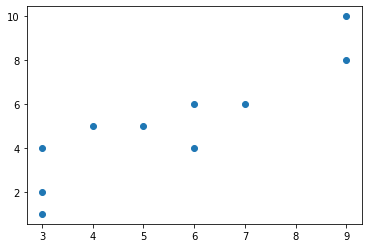

In [35]:
plt.plot(x, y, 'o')

## 2)공분산(covariance) 
두 변수가 함께 변화하는 정도를 나타내는 지표

In [37]:
print(np.cov(x,y))
print(np.cov(x,y)[0,1])
"""
공분산 해석
양수 : 두 변수가 같은 방향으로 변화
음수 : 두 변수가 반대 방향으로 변화
0 : 두 변수가 독립(상관이 전혀 없다)

!!! 크기는 단위(척도)에 따라 달라지므로 크기로 판단하면 안됌. -> 표준화 필요(-1~1사의 값) -> 상관계수(공분산을 표준화한 것)
"""

[[5.38888889 5.5       ]
 [5.5        6.98888889]]
5.499999999999999


## 3) 상관계수
- 두 변수가 함께 변하는 정도  
- -1 ~ +1 사이의 값

In [43]:
# 1) 피어슨 상관계수(일반적)
print(np.corrcoef(x,y))
print(np.corrcoef(x, y)[0,1])

################### 증명 #####################
#x,y의 공분산
cov = np.cov(x,y)[0,1]
#x, y의 표준편차
xsd = np.std(x, ddof=1) #x의 표본표준편차
ysd = np.std(y, ddof=1) #y의 표본표준편차
#상관계수
cov/(xsd*ysd)

"""
상관계수 해석 : 공분산 해석과 같음

상관계수를 제곱하면? 분산(변화량)에서 공유하는 비율
ex) x,y의 상관계수가 0.7 -> 제곱하면 0.49(49%)
    49%? x의 분산 중 49%를 y와 공유한다. x의 분산 중 49%를 y로 설명할 수 있음
    
상관계수는 선형적인 관계 측정. 비선형적인 변화의 경우는 잘 측정하지 못함.
"""

[[1.         0.89620839]
 [0.89620839 1.        ]]
0.8962083932927004


0.8962083932927

In [44]:
# 2) 스피어만 상관계수
# 서열척도, 비선형적인 관계, 정규성을 가지고 있지 않음.


scipy.stats.spearmanr(x, y).correlation

0.8972354465472708

In [45]:
# 3) 켄달 상관계수(표본이 작을 때)
# 서열척도, 비선형적
scipy.stats.kendalltau(x, y).correlation

0.8051175601825398

# 상관계수 통계적 검증

## P value
p값이 0.5보다 작은 경우 '통계적으로 유의미하다' 표현

In [ ]:
"""
유의 수준, 유의확률(p value), 귀무/대립 가설, 1종/2종 오류

1) 귀무/대립 가설?
표본으로 추론 -> 추론 통계 : 가설(귀무가설)을 세움 -> 가설을 입증

귀무가설 : 처음 세운 가설
대립 가설 : 실험자가 입증해야하는 가설(귀무가설의 대립되는 가설)

추론 통계 -> 귀무가설을 기각

ex) if 범죄자가 범인이라는 것을 입증하고자 한다면
    -> 귀무가설 : 범죄자는 범인이 아니다
    -> 귀무가설을 기각(대립가설 채택)하기 위한 입증 자료 수집 및 입증 -> 범죄자가 범인이다.
    
2) 실험자가 범할 수 있는 오류
1종오류 : 귀무가설이 참인데 기각한 경우 (죄가 없는 사람에게 죄가 있다고 말한 경우)
2종오류 : 귀무가설이 거짓인데 기각하지 않은 경우 (죄가 있는 사람에게 죄가 없다고 말한 경우)
=> 1종오류가 더 심각하다.

3) 유의 수준 :
- 1종 오류를 범할 수 있는 최대 허용 한계.
- 정밀도가 요구되는 실험은 0.01(1%)로 설정한다.
ex) 유의 수준 0.05(5%) : 100번 실험했을 때 1종 오류를 범할 수 있는 최대 허용 한계는 5번이다.

4)유의 확률(p-value)
- 1종 오류를 범할 확률
- 0 <= p-value <=1
- p-value 값이 유의 수준(0.05)보다 낮다 -> 실험이 통계적으로 의미 있다.(대립가설이 옳다)!!!!
ex) 0.05(5%) : 100번 실험했을 때 1종 오류가 5번 발생했다
    => 95%의 신뢰도로 귀무가설을 기각한다(대립가설을 채택)

"""

In [5]:
x = [7,3,6,6,9,4,3,9,3,5]
y = [6,2,4,6,10,5,1,8,4,5]

In [6]:
scipy.stats.pearsonr(x, y) # 값 두개를 resturn (상관계수, p-value)
#p-value : 0.0004471805248848928

(0.8962083932927004, 0.0004471805248848928)

# 상관분석 고려사항

---
* 산점도 : 선형성(직선) 확인
* 곡선형 : 스피어만, 캔달 상관분석
* 「상관관계가 있다고 해서 반드시 인과관계가 있는 것은 아니다.」 라는 사실
    ex) 제 3변인(feature)의 문제
        - 서울 범죄 발생 건수, 종교 시설의 개수 => 두 변수는 양의 상관관계지만, 서로 인과관계가 있는 것은 아님(제3의 변수를 고려)
* 극단치로 인한 인위적 상관관계 주의!
---

# 회귀와 분류
---
* 회귀분석(regression) : 독립변수(x)로 종속변수(y)를 예측하는 것. 종속변수가 연속인 경우
* 분류분석(classification) : 독립변수(x)로 종속변수(y)를 분류하는 것. 종속변수가 범주인 경우



*독립변수(x) : 종속변수에 영향을 미치는 변수들*  
*종속변수(y) : 예측하고자하는 변수*  
*혼입변수 : 모델에는 포함되지 않지만 종속변수에 영향을 주는 변수* 

---

# 분석의 종류
---
* 선형회귀분석
    - 독립변수와 종속변수 사이에 직선적인 형태(독립변수가 증가하면 종속변수도 비례하여 증가하거나 감소)의 관계가 있다고 가정하고 분석
    - 모델 수식 : y=wx+b (w:weight/가중치/회귀계수, b:bias/절편)  
      => 독립변수가 1 증가하면, 종속변수 y는 w만큼 증가한다.  
      => 독립변수가 0일때의 종속변수(y)의 값  
---